# 0 - quickStart Example

#### 1. Create a folder for your simulation, and load PV ICE

First let's set the folder where the simulation will be saved. By default, this is the TEMP folder in the PV_ICE distribution.

The lines below find the location of the folder relative to this Jupyter Journal. You can alternatively point to an empty directory (it will open a load GUI Visual Interface) or specify any other directory in your computer, for example:



In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [2]:
import PV_ICE

### 2. Create your Simulation Object

This will create the container for all the different scenario(s) you might want to test. We are also pointing to the testfolder defined above.

In [3]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)

path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


### 3. Specify your baseline Scenario 

We have put together scenarios representing the average module for various situations, for example throughout the US history. We will load this baseline scenario now, and it will be named ``standard``:

In [4]:
r1.createScenario(name='standard', file=r'..\baselines\baseline_modules_US.csv')

If a file is not provided, the automatic file loader will pop-up.



### 4. Specify material(s)

We will add the material 'glass' to our simulation. Years of data must match, and they do if using the provided baselines.

In [5]:
r1.scenario['standard'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')

### 5. Run the Mass Flow with Circular Pathways Calculations

In [6]:
r1.calculateMassFlow()

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [7]:
r1.scenario['standard'].data.head()

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,...,EOL_on_Year_51,EOL_on_Year_52,EOL_on_Year_53,EOL_on_Year_54,EOL_on_Year_55,EoL_Collected,EoL_NotCollected,EoL_Recycled,EoL_NotRecycled_Landfilled,ModuleTotal_MFG
0,1995,12.500000,12.50,16.0,21.0,0.55,10.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,102040.816327
1,1996,9.667667,12.70,16.0,21.0,0.55,10.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.050224,0.284603,0.020090,0.030134,77676.897533
2,1997,11.622000,12.88,19.0,23.0,0.55,15.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,1.109497,6.287151,0.443799,0.665698,92074.407403
3,1998,11.781000,13.06,19.0,23.0,0.55,15.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,7.230681,40.973860,2.892272,4.338409,92047.691971
4,1999,16.884667,13.24,19.0,23.0,0.55,15.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,27.712858,157.039528,11.085143,16.627715,130130.299880


###  6. Plot Mass Flow Results

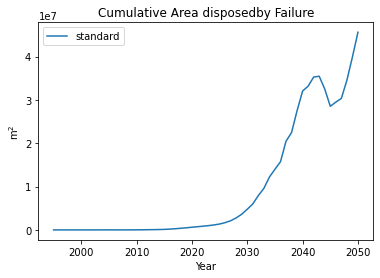

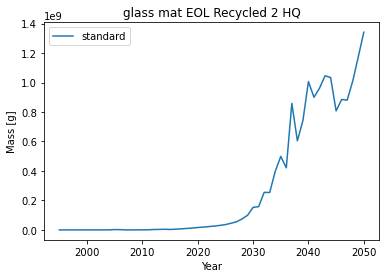

In [8]:
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_EOL_Recycled_2_HQ')